# E-commerce Sales Analysis


## Project Overview
This project analyzes sales data from an e-commerce platform to uncover insights into product performance, category trends, and pricing strategies. The goal is to provide actionable recommendations to optimize revenue and inventory management. The dataset, containing 100 sales transactions, includes product details, quantities, prices, and total sales.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Overview
This dataset contains 100 records of sales transactions from an e-commerce platform. The columns include:

- Order_ID: Unique identifier for each order.
- Product: Name of the product sold.
- Category: Category of the product.
- Quantity: Quantity of the product sold.
- Price_per_Unit: Price of one unit of the product.
- Total_Sale: Total sale amount for the product.


In [2]:
# Loading dataset
df = pd.read_csv('../data/ecommerce_sales.csv')

In [3]:
# Initial preview of data
df.head()

,Order_ID,Product,Category,Quantity,Price_per_Unit,Total_Sale
0,1,Laptop,Electronics,2,1446,2892
1,2,Laptop,Accessories,4,693,2772
2,3,Headphones,Electronics,7,1626,11382
3,4,Smartphone,Accessories,6,63,378
4,5,Smartphone,Accessories,9,1097,9873


## Data Cleaning 

#### This section focuses on cleaning the data by removing duplicates, handling missing values, and correcting incorrect formats. The aim is to ensure the dataset is accurate and ready for analysis.."

In [4]:
# Knowing the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Order_ID        100 non-null    int64 
 1   Product         100 non-null    object
 2   Category        100 non-null    object
 3   Quantity        100 non-null    int64 
 4   Price_per_Unit  100 non-null    int64 
 5   Total_Sale      100 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 4.8+ KB


In [5]:
# Summary statistics of the DataFrame
df.describe()

,Order_ID,Quantity,Price_per_Unit,Total_Sale
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,4.770000,1045.050000,5123.830000
std,29.011492,2.824335,599.486487,4621.943356
min,1.000000,1.000000,56.000000,63.000000
25%,25.750000,2.000000,531.250000,1494.750000
50%,50.500000,5.000000,1096.500000,3273.000000
75%,75.250000,7.000000,1554.000000,7789.500000
max,100.000000,9.000000,1980.000000,17307.000000


In [6]:
# Checking for missing values
df.isnull().sum()

Order_ID          0
Product           0
Category          0
Quantity          0
Price_per_Unit    0
Total_Sale        0
dtype: int64

In [7]:
# Checking for and dropping duplicates
df.duplicated().sum()
df = df.drop_duplicates()

In [8]:
# Checking for negative quantities and removing them
df = df[df['Quantity'] > 0]

In [9]:
# Ensuring numeric columns are correctly typed
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price_per_Unit'] = pd.to_numeric(df['Price_per_Unit'], errors='coerce')
df['Total_Sale'] = pd.to_numeric(df['Total_Sale'], errors='coerce')

In [10]:
# Dropping rows that failed to convert
df = df.dropna(subset=['Quantity', 'Price_per_Unit', 'Total_Sale'])

In [11]:
# Verifying Total_Sale calculation
df['Calculated_Total'] = df['Quantity'] * df['Price_per_Unit']
discrepancies = df[df['Total_Sale'] != df['Calculated_Total']]
if discrepancies.empty:
    print("All Total_Sale values are correct.")
else:
    print("Found discrepancies in Total_Sale:")
    print(discrepancies[['Order_ID', 'Quantity', 'Price_per_Unit', 'Total_Sale', 'Calculated_Total']])
df = df.drop(columns=['Calculated_Total'])

print(f"Number of duplicates removed: {100 - len(df)}")
print(f"Number of rows with negative quantities removed: {100 - len(df[df['Quantity'] > 0])}")

All Total_Sale values are correct.
Number of duplicates removed: 0
Number of rows with negative quantities removed: 0


In [12]:
# Final check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Order_ID        100 non-null    int64 
 1   Product         100 non-null    object
 2   Category        100 non-null    object
 3   Quantity        100 non-null    int64 
 4   Price_per_Unit  100 non-null    int64 
 5   Total_Sale      100 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 4.8+ KB


## Exploratory Data Analysis

#### This section explores key performance metrics from the e-commerce dataset, focusing on sales volume, revenue, and pricing across products and categories. The goal is to identify top performers, popular products, and pricing trends.


In [13]:
#Identifying which products have generated the most revenue overall.
product_revenue = df.groupby('Product')['Total_Sale'].sum().sort_values(ascending=False)
product_revenue.head(10)

Product
Laptop        162098
Headphones    155194
Tablet        113347
Smartphone     81744
Name: Total_Sale, dtype: int64

In [14]:
# Identifying which product categories contribute most to the business's total revenue.
category_revenue = df.groupby('Category')['Total_Sale'].sum().sort_values(ascending=False)
category_revenue

Category
Electronics    258523
Accessories    253860
Name: Total_Sale, dtype: int64

In [15]:
# Identifying which products are purchased most frequently, regardless of their price?
top_quantity = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
top_quantity.head(10)

Product
Laptop        150
Headphones    129
Tablet        103
Smartphone     95
Name: Quantity, dtype: int64

In [16]:
# Understanding the pricing levels across different categories.
avg_price = df.groupby('Category')['Price_per_Unit'].mean().sort_values(ascending=False)
avg_price

Category
Electronics    1070.86
Accessories    1019.24
Name: Price_per_Unit, dtype: float64

In [17]:
# Finding revenue per order
order_revenue = df.groupby('Order_ID')['Total_Sale'].sum().sort_values(ascending=False)
order_revenue.describe()

count      100.000000
mean      5123.830000
std       4621.943356
min         63.000000
25%       1494.750000
50%       3273.000000
75%       7789.500000
max      17307.000000
Name: Total_Sale, dtype: float64

## Visualizations

#### This section presents key visualizations from the e-commerce dataset, highlighting sales trends, product performance, and category-wise revenue distribution. The goal is to provide clear insights into product popularity, sales patterns, and pricing strategies.

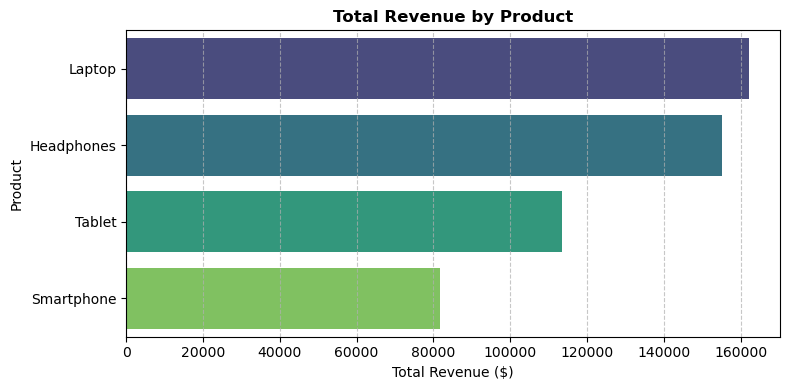

In [18]:
# Visualizing the products by revenue to identify the highest-performing products
plt.figure(figsize=(8, 4)) 
sns.barplot(x=product_revenue.values, y=product_revenue.index, hue=product_revenue.index, palette='viridis', legend=False)
plt.title('Total Revenue by Product', fontsize=12, weight='bold')
plt.xlabel('Total Revenue ($)', fontsize=10)
plt.ylabel('Product', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('../visuals/top_products_by_revenue.png')
plt.show()

###### This bar chart shows which products generate the most revenue. Laptops lead, followed by Headphones, Tablets, and Smartphones. This suggests Laptops are a key driver of sales.

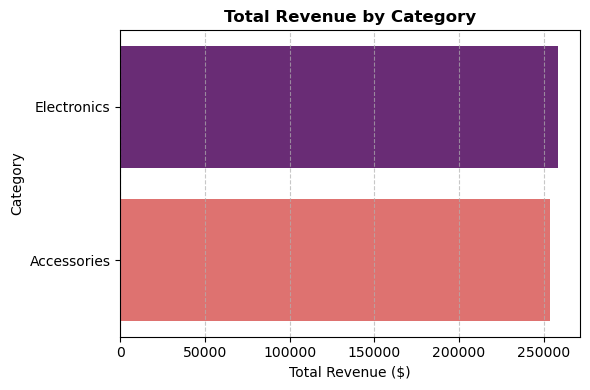

In [19]:
# Visualizing revenue distribution across different categories to understand category-wise performance
plt.figure(figsize=(6, 4))
sns.barplot(x=category_revenue.values, y=category_revenue.index, hue=category_revenue.index, palette='magma', legend=False)
plt.title('Total Revenue by Category', fontsize=12, weight='bold')
plt.xlabel('Total Revenue ($)', fontsize=10)
plt.ylabel('Category', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('../visuals/revenue_distribution_by_category.png')
plt.show()

###### This bar chart shows revenue by category. Electronics slightly outperforms Accessories, but both are important for the business.

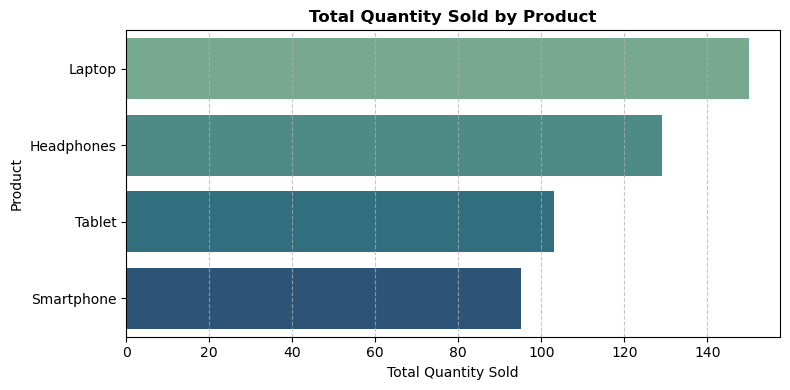

In [20]:
# Visualizing the top products by quantity sold to identify the most popular products
plt.figure(figsize=(8, 4))
sns.barplot(x=top_quantity.values, y=top_quantity.index, hue=top_quantity.index, palette='crest', legend=False)
plt.title('Total Quantity Sold by Product', fontsize=12, weight='bold')
plt.xlabel('Total Quantity Sold', fontsize=10)
plt.ylabel('Product', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('../visuals/top_products_by_quantity_sold.png')
plt.show()

###### This bar chart shows how many units of each product were sold. Laptops are the most popular, followed by Headphones, Tablets, and Smartphones. This means customers buy Laptops the most.

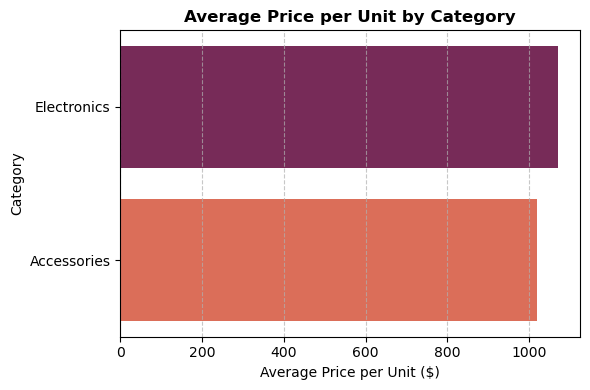

In [21]:
# Visualizing the average price per unit across different categories to understand pricing trends
plt.figure(figsize=(6, 4))  
sns.barplot(x=avg_price.values, y=avg_price.index, hue=avg_price.index, palette='rocket', legend=False)  
plt.title('Average Price per Unit by Category', fontsize=12, weight='bold')  
plt.xlabel('Average Price per Unit ($)', fontsize=10)  
plt.ylabel('Category', fontsize=10)  
plt.grid(axis='x', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.savefig('../visuals/average_price_per_unit_by_category.png')
plt.show()

###### This bar chart shows the average price of products in each category. Electronics products are a little more expensive than Accessories. This might explain why Electronics make a bit more money.

## Summary and Recommendations

This analysis of e-commerce sales data reveals key insights:

*Top Products: Laptops generate the most revenue (AUD 162,098) and are the most popular (150 units sold), making them a flagship product.

*Category Performance: Electronics (AUD 258,523) and Accessories (AUD 253,860) contribute nearly equally to revenue, with Electronics slightly ahead due to higher average prices (AUD 1070.86) compared to Accessories (AUD 1019.24).

*Pricing Trends: Electronics products are priced slightly higher, which boosts their revenue despite similar sales volumes to Accessories.

### Recommendations

*Promote Laptops: Increase marketing for Laptops, as they drive both revenue and popularity.

*Balance Inventory: Maintain stock for both Electronics and Accessories, as both are critical to sales.

*Price Optimization: Consider slight price adjustments for Accessories to boost their revenue, given their strong sales volume.

These strategies can help the business maximize revenue and customer satisfaction.s).

### Limitations and Future Work

*Small Dataset: The dataset contains only 100 records, limiting the generalizability of insights.

*Lack of Temporal Data: Without timestamps, trends over time (e.g., seasonality) cannot be analyzed.

*Future Work: Incorporate customer demographics or time-series data to refine recommendations and explore predictive modeling (e.g., forecasting sales).